In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set_theme(style="white")

# Data for 2019 extension

## World Values Survey

In [2]:
df = pd.read_csv(
    'WVS_Cross-National_Wave_7_csv_v5_0.csv')
df.columns

Index(['version', 'doi', 'A_WAVE', 'A_YEAR', 'A_STUDY', 'B_COUNTRY',
       'B_COUNTRY_ALPHA', 'C_COW_NUM', 'C_COW_ALPHA', 'D_INTERVIEW',
       ...
       'WVS_Polmistrust_PartyVoter', 'WVS_LR_MedianVoter',
       'WVS_LibCon_MedianVoter', 'v2psbars', 'v2psorgs', 'v2psprbrch',
       'v2psprlnks', 'v2psplats', 'v2xnp_client', 'v2xps_party'],
      dtype='object', length=606)

In [3]:
unem_columns = [column for column in df.columns if 'unem' in column]
unem_columns

['unemployfem', 'unemploymale', 'unemploytotal']

In [4]:
unem_columns.append('B_COUNTRY_ALPHA')

In [5]:
df[unem_columns][df['B_COUNTRY_ALPHA']=='AUS'].value_counts()

unemployfem  unemploymale  unemploytotal  B_COUNTRY_ALPHA
5.33         5.22          5.27           AUS                1813
dtype: int64

## Paper

In [6]:
df_cross_country = pd.read_stata('crosscountry_dataset.dta')
df_cross_country

,isocode,flfp2000,female_ownership,women_politics,plow,agricultural_suitability,tropical_climate,large_animals,political_hierarchies,economic_complexity,...,terrslope2,soil2,avg_temp2,avg_precip2,slope_soil,slope_temp,slope_precip,soil_temp,soil_precip,temp_precip
0,ABW,NaN,NaN,NaN,0.000000,0.829847,1.000000,1.000000,4.000000,7.000000,...,23.248068,0.796877,694.377380,9291.514648,4.304165,127.054840,464.768494,23.523033,86.047607,2540.042725
1,AFG,31.3,2.8,NaN,0.999969,0.229267,0.785295,1.000000,3.633688,6.199330,...,623.563904,0.068421,74.482773,538.041870,6.531851,215.510483,579.226624,2.257479,6.067417,200.187042
2,AGO,75.2,56.6,16.0,0.000000,0.921061,1.000000,0.998896,2.720727,6.697217,...,358.600311,0.970410,418.034027,9126.774414,18.654472,387.178406,1809.105957,20.141113,94.110115,1953.279907
3,AIA,NaN,NaN,NaN,0.000000,0.829847,1.000000,1.000000,4.000000,7.000000,...,23.248068,0.796877,694.377380,9291.514648,4.304165,127.054840,464.768494,23.523033,86.047607,2540.042725
4,ALB,50.2,10.8,5.0,1.000000,0.555928,0.359318,1.000000,3.029723,5.035051,...,986.303772,0.609834,122.236977,6294.060547,24.525124,347.221527,2491.556885,8.633903,61.954281,877.135620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,YUG,NaN,28.8,NaN,1.000000,0.775941,0.080989,1.000000,3.822862,7.444995,...,567.683655,0.759602,116.812553,4452.978027,20.765686,257.512268,1589.931641,9.419717,58.159191,721.223755
230,ZAF,44.3,22.6,30.0,0.540551,0.865508,0.901535,0.999999,3.550035,5.920460,...,594.206116,0.745225,312.183350,4103.467285,21.043222,430.698578,1561.507446,15.252764,55.299240,1131.827759
231,ZAR,55.5,38.9,NaN,0.000000,0.423659,1.000000,0.928739,2.383938,6.545618,...,104.809097,0.970129,546.375610,15426.306641,10.083570,239.301346,1271.541260,23.022926,122.333626,2903.197754
232,ZMB,62.1,37.2,10.0,0.000000,0.955900,1.000000,0.754301,2.390349,5.871349,...,139.062561,0.892828,442.156647,7636.923828,11.142666,247.966599,1030.538818,19.868818,82.573975,1837.584473


In [7]:
df_cross_country[df_cross_country['isocode'] == 'USA']

,isocode,flfp2000,female_ownership,women_politics,plow,agricultural_suitability,tropical_climate,large_animals,political_hierarchies,economic_complexity,...,terrslope2,soil2,avg_temp2,avg_precip2,slope_soil,slope_temp,slope_precip,soil_temp,soil_precip,temp_precip
217,USA,59.5,NaN,13.0,0.972528,0.855395,0.043982,0.994987,3.949898,7.927381,...,270.071136,0.944029,75.51651,7971.624512,15.967307,142.810471,1467.27832,8.443326,86.749306,775.8797


## World Bank (for all indicators)

In [8]:
df = pd.read_csv('data_table3.csv').set_index(['Country Name', 'Country Code'])

In [9]:
df

Series Name  \
Country Name                                     Country Code                                                      
Afghanistan                                      AFG           Labor force participation rate, female (% of f...   
                                                 AFG           Firms with female participation in ownership (...   
                                                 AFG           Proportion of seats held by women in national ...   
Albania                                          ALB           Labor force participation rate, female (% of f...   
                                                 ALB           Firms with female participation in ownership (...   
...                                                                                                          ...   
NaN                                              NaN                                                         NaN   
                                                 NaN                                                         NaN   
                                                 NaN                                                         NaN   
Data from database: World Development Indicators NaN                                                         NaN   
Last Updated: 12/22/2022                         NaN                                                         NaN   

                                                                     Series Code  \
Country Name                                     Country Code                      
Afghanistan                                      AFG           SL.TLF.ACTI.FE.ZS   
                                                 AFG              IC.FRM.FEMO.ZS   
                                                 AFG              SG.GEN.PARL.ZS   
Albania                                          ALB           SL.TLF.ACTI.FE.ZS   
                                                 ALB              IC.FRM.FEMO.ZS   
...                                                                          ...   
NaN                                              NaN                         NaN   
                                                 NaN                         NaN   
                                                 NaN                         NaN   
Data from database: World Development Indicators NaN                         NaN   
Last Updated: 12/22/2022                         NaN                         NaN   

                                                              1999 [YR1999]  \
Country Name                                     Country Code                 
Afghanistan                                      AFG                   15.4   
                                                 AFG                     ..   
                                                 AFG                     ..   
Albania                                          ALB                  58.87   
                                                 ALB                     ..   
...                                                                     ...   
NaN                                              NaN                    NaN   
                                                 NaN                    NaN   
                                                 NaN                    NaN   
Data from database: World Development Indicators NaN                    NaN   
Last Updated: 12/22/2022                         NaN                    NaN   

                                                              2000 [YR2000]  \
Country Name                                     Country Code                 
Afghanistan                                      AFG                  15.35   
                                                 AFG                     ..   
                                                 AFG                     ..   
Albania                                          ALB                  57.89 

### Female ownership 2010-2019, replace missing values with previous years

In [10]:
female_ownership2010_to_2019 = df[df['Series Name'] == 'Firms with female participation in ownership (% of firms)'][['2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]',
                                                                                                                     '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]']].reset_index()
female_ownership2010_to_2019.replace('..', np.nan, inplace=True)
female_ownership2010_to_2019.iloc[:, 2:].astype(float)
female_ownership2010_to_2019


,Country Name,Country Code,2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,NaN,NaN,12.8,NaN,10.8,NaN,NaN,NaN,NaN,NaN,13.1,NaN,NaN,NaN,NaN,NaN,20.7
2,Algeria,DZA,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,PSE,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,10.7,NaN,NaN,NaN,NaN,NaN,6
214,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4,NaN,NaN,6.6,NaN,NaN,NaN,NaN,NaN,NaN
215,Zambia,ZMB,NaN,NaN,NaN,NaN,37.2,NaN,NaN,NaN,NaN,NaN,43.7,NaN,NaN,NaN,NaN,NaN,41.5


In [11]:
for col in range(-2, -11, -1):
    female_ownership2010_to_2019['2019 [YR2019]'] = female_ownership2010_to_2019['2019 [YR2019]'].fillna(
        female_ownership2010_to_2019.iloc[:, col])
    print('values not nan', female_ownership2010_to_2019['2019 [YR2019]'].notna(
    ).sum(), 'year 2019 -', female_ownership2010_to_2019.iloc[:, col].name)


values not nan 47 year 2019 - 2018 [YR2018]
values not nan 58 year 2019 - 2017 [YR2017]
values not nan 75 year 2019 - 2016 [YR2016]
values not nan 83 year 2019 - 2015 [YR2015]
values not nan 94 year 2019 - 2014 [YR2014]
values not nan 107 year 2019 - 2013 [YR2013]
values not nan 108 year 2019 - 2012 [YR2012]
values not nan 111 year 2019 - 2011 [YR2011]
values not nan 130 year 2019 - 2010 [YR2010]


In [12]:
female_ownership2010_to_2019 = female_ownership2010_to_2019[['Country Name', 'Country Code', '2019 [YR2019]']]
female_ownership2010_to_2019

,Country Name,Country Code,2019 [YR2019]
0,Afghanistan,AFG,2.2
1,Albania,ALB,20.7
2,Algeria,DZA,NaN
3,American Samoa,ASM,NaN
4,Andorra,AND,NaN
...,...,...,...
212,Virgin Islands (U.S.),VIR,NaN
213,West Bank and Gaza,PSE,6
214,"Yemen, Rep.",YEM,6.6
215,Zambia,ZMB,41.5


### All indicators

In [13]:
flfp2019 = df[df['Series Name'] == 'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)']['2019 [YR2019]'].reset_index()
women_politics2019 = df[df['Series Name'] == 'Proportion of seats held by women in national parliaments (%)']['2019 [YR2019]'].reset_index()

In [14]:
[[flfp2019,women_politics2019]]

[[              Country Name Country Code 2019 [YR2019]
  0              Afghanistan          AFG         22.74
  1                  Albania          ALB         61.46
  2                  Algeria          DZA          18.7
  3           American Samoa          ASM            ..
  4                  Andorra          AND            ..
  ..                     ...          ...           ...
  212  Virgin Islands (U.S.)          VIR         67.36
  213     West Bank and Gaza          PSE         19.15
  214            Yemen, Rep.          YEM          6.29
  215                 Zambia          ZMB         71.29
  216               Zimbabwe          ZWE         79.11
  
  [217 rows x 3 columns],
                Country Name Country Code      2019 [YR2019]
  0              Afghanistan          AFG   27.8688524590164
  1                  Albania          ALB   29.5081967213115
  2                  Algeria          DZA   25.7575757575758
  3           American Samoa          ASM              

## Paper + WorldBank datasets for 2019

In [15]:
df_cross_country2019 = pd.merge(
    df_cross_country, flfp2019, left_on='isocode', right_on='Country Code', how='left'
).drop(['Country Code', 'Country Name'], axis=1
       ).rename(columns={'2019 [YR2019]': 'flfp2019'}
                ).merge(women_politics2019, left_on='isocode', right_on='Country Code', how='left'
                        ).drop(['Country Code', 'Country Name'], axis=1
                               ).rename(columns={'2019 [YR2019]': 'women_politics2019'}
                                        ).merge(female_ownership2010_to_2019, left_on='isocode', right_on='Country Code', how='left'
                                                ).drop(['Country Code', 'Country Name'], axis=1
                                                       ).rename(columns={'2019 [YR2019]': 'female_ownership2010_to_2019'})

In [16]:
df_cross_country2019[['flfp2019', 'women_politics2019', 'female_ownership2010_to_2019']] = df_cross_country2019[['flfp2019', 'women_politics2019', 'female_ownership2010_to_2019']
                                                                                                        ].replace('..', np.nan).astype(float)

In [17]:
df_cross_country2019

,isocode,flfp2000,female_ownership,women_politics,plow,agricultural_suitability,tropical_climate,large_animals,political_hierarchies,economic_complexity,...,avg_precip2,slope_soil,slope_temp,slope_precip,soil_temp,soil_precip,temp_precip,flfp2019,women_politics2019,female_ownership2010_to_2019
0,ABW,NaN,NaN,NaN,0.000000,0.829847,1.000000,1.000000,4.000000,7.000000,...,9291.514648,4.304165,127.054840,464.768494,23.523033,86.047607,2540.042725,NaN,NaN,NaN
1,AFG,31.3,2.8,NaN,0.999969,0.229267,0.785295,1.000000,3.633688,6.199330,...,538.041870,6.531851,215.510483,579.226624,2.257479,6.067417,200.187042,22.74,27.868852,2.2
2,AGO,75.2,56.6,16.0,0.000000,0.921061,1.000000,0.998896,2.720727,6.697217,...,9126.774414,18.654472,387.178406,1809.105957,20.141113,94.110115,1953.279907,76.88,30.000000,56.6
3,AIA,NaN,NaN,NaN,0.000000,0.829847,1.000000,1.000000,4.000000,7.000000,...,9291.514648,4.304165,127.054840,464.768494,23.523033,86.047607,2540.042725,NaN,NaN,NaN
4,ALB,50.2,10.8,5.0,1.000000,0.555928,0.359318,1.000000,3.029723,5.035051,...,6294.060547,24.525124,347.221527,2491.556885,8.633903,61.954281,877.135620,61.46,29.508197,20.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,YUG,NaN,28.8,NaN,1.000000,0.775941,0.080989,1.000000,3.822862,7.444995,...,4452.978027,20.765686,257.512268,1589.931641,9.419717,58.159191,721.223755,NaN,NaN,NaN
230,ZAF,44.3,22.6,30.0,0.540551,0.865508,0.901535,0.999999,3.550035,5.920460,...,4103.467285,21.043222,430.698578,1561.507446,15.252764,55.299240,1131.827759,54.07,46.347607,NaN
231,ZAR,55.5,38.9,NaN,0.000000,0.423659,1.000000,0.928739,2.383938,6.545618,...,15426.306641,10.083570,239.301346,1271.541260,23.022926,122.333626,2903.197754,NaN,NaN,NaN
232,ZMB,62.1,37.2,10.0,0.000000,0.955900,1.000000,0.754301,2.390349,5.871349,...,7636.923828,11.142666,247.966599,1030.538818,19.868818,82.573975,1837.584473,71.29,17.964072,41.5


## AES

In [18]:
# compute the average effect size for the outcome columns flfp2000, female_ownership and women_politics
# for each country in the cross-country dataset
df_cross_country['aes'] = pd.concat([df_cross_country['flfp2000'] /
                                     df_cross_country[df_cross_country.plow == 0]['flfp2000'].std(
),
    df_cross_country['female_ownership'] /
    df_cross_country[df_cross_country.plow == 0]['female_ownership'].std(
),
    df_cross_country['women_politics'] /
    df_cross_country[df_cross_country.plow == 0]['women_politics'].std()
],
    axis=1).dropna(how='any').mean(axis=1)  # dropped rows with any missing values, to match the stata code
# Still coudln't match the standard errors (they might be calculated with a different regression
# on other data


df_cross_country2019['aes2019'] = pd.concat([df_cross_country2019['flfp2019'] /
                                         df_cross_country2019[df_cross_country2019.plow == 0]['flfp2019'].std(
),
    df_cross_country2019['female_ownership2010_to_2019'] /
    df_cross_country2019[df_cross_country2019.plow == 0]['female_ownership2010_to_2019'].std(
),
    df_cross_country2019['women_politics2019'] /
    df_cross_country2019[df_cross_country2019.plow ==
                         0]['women_politics2019'].std()
],
    axis=1).dropna(how='any').mean(axis=1)

# Data for minutes spent at home extension

**Indicator**

Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)

In [19]:
df_f_unpaid = pd.read_excel('female_unpaid_work.xls').drop(['Indicator Name', 'Indicator Code'], axis=1).iloc[:,:-2]
df_f_unpaid

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.55556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_f_unpaid.iloc[:, 2:] = df_f_unpaid.iloc[:, 2:].astype(float)
df_f_unpaid

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.55556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# lots of no values at all for some countries (from the 1960s) values
df_f_unpaid.set_index(['Country Name','Country Code']).T.count().value_counts()

0     177
1      44
2      29
3       6
4       6
5       2
6       1
17      1
dtype: int64

In [22]:
for col in range(-2, -21, -1):
    df_f_unpaid['2019'] = df_f_unpaid['2019'].fillna(
        df_f_unpaid.iloc[:, col])
    print('values not nan', df_f_unpaid['2019'].notna(
    ).sum(), 'year 2019 -', df_f_unpaid.iloc[:, col].name)

df_f_unpaid2000_to_2019 = df_f_unpaid[['Country Name', 'Country Code', '2019']]
df_f_unpaid2000_to_2019

values not nan 7 year 2019 - 2018
values not nan 13 year 2019 - 2017
values not nan 20 year 2019 - 2016
values not nan 31 year 2019 - 2015
values not nan 37 year 2019 - 2014
values not nan 46 year 2019 - 2013
values not nan 52 year 2019 - 2012
values not nan 56 year 2019 - 2011
values not nan 66 year 2019 - 2010
values not nan 71 year 2019 - 2009
values not nan 74 year 2019 - 2008
values not nan 76 year 2019 - 2007
values not nan 78 year 2019 - 2006
values not nan 80 year 2019 - 2005
values not nan 81 year 2019 - 2004
values not nan 86 year 2019 - 2003
values not nan 87 year 2019 - 2002
values not nan 89 year 2019 - 2001
values not nan 89 year 2019 - 2000


,Country Name,Country Code,2019
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,NaN
2,Afghanistan,AFG,NaN
3,Africa Western and Central,AFW,NaN
4,Angola,AGO,NaN
...,...,...,...
261,Kosovo,XKX,NaN
262,"Yemen, Rep.",YEM,NaN
263,South Africa,ZAF,15.55556
264,Zambia,ZMB,NaN


## Data for number of children

In [23]:
df_fertility2019 = pd.read_csv('fertility_rate.csv')[['Country Name', 'Country Code','2019']]
df_fertility2019

,Country Name,Country Code,2019
0,Aruba,ABW,1.486000
1,Africa Eastern and Southern,AFE,4.482899
2,Afghanistan,AFG,4.870000
3,Africa Western and Central,AFW,5.118932
4,Angola,AGO,5.442000
...,...,...,...
261,Kosovo,XKX,1.546000
262,"Yemen, Rep.",YEM,3.963000
263,South Africa,ZAF,2.475000
264,Zambia,ZMB,4.451000


## Paper + Minutes spent at home data

In [24]:
df_cross_country_unpaid = df_cross_country.merge(
    df_f_unpaid2000_to_2019, left_on='isocode', right_on='Country Code', how='left'
).drop(['Country Code', 'Country Name'], axis=1
       ).rename(columns={'2019': 'f_unpaidwk2000_to_2019'}
                ).merge(df_fertility2019, left_on='isocode', right_on='Country Code', how='left').drop(['Country Code', 'Country Name'], axis=1
                                                                                                       ).rename(columns={'2019': 'fertility2019'})


# Ethnographic atlas controls extension

## Getting country data for EA, geolocation angle

In [25]:
isocode2_to3 = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')[['Alpha-2 code','Alpha-3 code']]
isocode2_to3['Alpha-2 code'] = isocode2_to3['Alpha-2 code'].str[2:4]
isocode2_to3['Alpha-3 code'] = isocode2_to3['Alpha-3 code'].str[2:5]
country_codes = isocode2_to3.set_index('Alpha-2 code').to_dict()['Alpha-3 code']

In [26]:
# import reverse_geocoder as rg
# df_soc = pd.read_csv('societies.csv')[['id','Lat','Long']]
# df_soc['Country'] = df_soc.apply(lambda row: rg.search((row.Lat,row.Long))[0]['cc'],axis=1)

df_soc = pd.read_csv('df_socc')[['id','Country']]
df_soc['Country'] = df_soc['Country'].replace(country_codes)
df_soc

,id,Country
0,Aa1,BWA
1,Ab1,NaN
2,Ad31,KEN
3,Ad32,KEN
4,Ad33,KEN
...,...,...
1286,Ad29,TZA
1287,Ad3,TZA
1288,Ad30,KEN
1289,Nd26,USA


In [27]:
df_ea = pd.read_csv('https://raw.githubusercontent.com/D-PLACE/dplace-data/master/datasets/EA/data.csv').merge(df_soc, left_on='soc_id', right_on='id', how='inner').drop(['id'], axis=1)
df_ea

,soc_id,sub_case,year,var_id,code,comment,references,source_coded_data,admin_comment,Country
0,Aa1,Nyai Nyae region,1950.0,EA001,8.0,NaN,biesele1972; biesele1975; biesele1976; draper1...,EthnographicAtlas_1967_p62,NaN,BWA
1,Aa1,Nyai Nyae region,1950.0,EA010,9.0,NaN,biesele1972; biesele1975; biesele1976; draper1...,EthnographicAtlas_1967_p62,NaN,BWA
2,Aa1,Nyai Nyae region,1950.0,EA011,2.0,NaN,biesele1972; biesele1975; biesele1976; draper1...,EthnographicAtlas_1967_p62,NaN,BWA
3,Aa1,Nyai Nyae region,1950.0,EA112,1.0,NaN,NaN,Gray (1999); Bourguignon (1973),NaN,BWA
4,Aa1,Nyai Nyae region,1950.0,EA113,2.0,NaN,NaN,Gray (1999); Greenbaum (1973),NaN,BWA
...,...,...,...,...,...,...,...,...,...,...
121349,ec21,Hor River group,1890.0,EA087,8.0,NaN,arsenev1926; girfanova2000; ivashchenko1989; k...,Ethnology_Vol43_No1_Winter_2004,NaN,RUS
121350,ec21,Hor River group,1890.0,EA088,4.0,NaN,arsenev1926; girfanova2000; ivashchenko1989; k...,Ethnology_Vol43_No1_Winter_2004,NaN,RUS
121351,ec21,Hor River group,1890.0,EA009,2.0,NaN,arsenev1926; girfanova2000; ivashchenko1989; k...,Ethnology_Vol43_No1_Winter_2004,NaN,RUS
121352,ec21,NaN,NaN,EA090,NaN,NaN,NaN,NaN,NaN,RUS


In [28]:
df_ea_codes = pd.read_csv('https://raw.githubusercontent.com/D-PLACE/dplace-data/master/datasets/EA/codes.csv')
df_ea_codes

,var_id,code,description,name
0,EA001,0.0,Zero to 5 percent dependence,0-5%
1,EA001,1.0,6 to 15 percent dependence,6-15%
2,EA001,2.0,16 to 25 percent dependence,16-25%
3,EA001,3.0,26 to 35 percent dependence,26-35%
4,EA001,4.0,36 to 45 percent dependence,36-45%
...,...,...,...,...
751,EA112,8.0,No trance states of any kind are known to occu...,No trance or possession
752,EA113,NaN,Missing data,Missing data
753,EA113,1.0,"Rigid, characterized as: non-egalitarian, ascr...",Rigid
754,EA113,2.0,"Flexible, characterized as: egalitarian, achie...",Flexible


In [29]:
df_ea = df_ea.merge(df_ea_codes, left_on=['var_id','code'], right_on=['var_id','code'], how='left').rename(columns={'description': 'value_description','name':'value_name'})

## Control variable analysis

In [30]:
df_ea = df_ea.sort_values(by=['var_id','soc_id']).reset_index(drop=True)
df_ea

,soc_id,sub_case,year,var_id,code,comment,references,source_coded_data,admin_comment,Country,value_description,value_name
0,Aa1,Nyai Nyae region,1950.0,EA001,8.0,NaN,biesele1972; biesele1975; biesele1976; draper1...,EthnographicAtlas_1967_p62,NaN,BWA,76 to 85 percent dependence,76-85%
1,Aa2,with special reference to Central Dorobo,1920.0,EA001,4.0,NaN,huntingford1929; huntingford1942; huntingford1...,EthnographicAtlas_1967_p62,NaN,KEN,36 to 45 percent dependence,36-45%
2,Aa3,Gei/Khauan tribe,1840.0,EA001,1.0,NaN,hoernl1918; hoernl1925; kohler1970; murdock193...,EthnographicAtlas_1967_p62,NaN,NaN,6 to 15 percent dependence,6-15%
3,Aa4,NaN,1920.0,EA001,4.0,NaN,lebzelter1934; schmidt1930; vedder1923,Ethnology_Vol1_No3_Jul_1962,NaN,NaN,36 to 45 percent dependence,36-45%
4,Aa5,"Epulu net-hunters, Ituri forest",1930.0,EA001,3.0,NaN,deleeuwe1966; hart1978; putnam1948; turnbull19...,EthnographicAtlas_1967_p62,NaN,COD,26 to 35 percent dependence,26-35%
...,...,...,...,...,...,...,...,...,...,...,...,...
121349,ec17,Upper Amgun' River group,1890.0,EA202,420.0,Upper Amgun River group,NaN,"Korotayev et al., 2004",NaN,RUS,NaN,NaN
121350,ec18,Ulch people as a whole,1890.0,EA202,3000.0,NaN,NaN,"Korotayev et al., 2004",NaN,RUS,NaN,NaN
121351,ec19,Northern group,1890.0,EA202,500.0,NaN,NaN,"Korotayev et al., 2004",NaN,RUS,NaN,NaN
121352,ec20,Oroch people as a whole,1890.0,EA202,800.0,NaN,NaN,"Korotayev et al., 2004",NaN,RUS,NaN,NaN


In [31]:
df_ea = df_ea.drop(['sub_case', 'year','comment','references','source_coded_data','admin_comment','code','soc_id','value_description'], axis=1)

In [32]:
def md(x):
    if type(x[0]) is np.ndarray:
        if len(x[0]) == 0:
            return np.nan
        return x[0][0]
    else:
        return x

df_ea = df_ea.groupby(['Country','var_id']).agg(pd.Series.mode).apply(md,axis=1).unstack().astype('category').droplevel(0, axis=1).reset_index()
df_ea

var_id,Country,EA001,EA002,EA003,EA004,EA005,EA006,EA007,EA008,EA009,...,EA085,EA086,EA087,EA088,EA090,EA094,EA112,EA113,EA201,EA202
0,AFG,0-5%,0-5%,0-5%,26-35%,56-65%,Bride-wealth,Dowry,Small extended,Limited polygyny,...,Missing data,Missing data,Missing data,Missing data,Minimal states,Missing data,Missing data,Missing data,Same,NaN
1,AGO,0-5%,6-15%,6-15%,6-15%,46-55%,Bride-wealth,No alternate,"Polygyny, typical cowives pattern","Polygyny, non-sororal separate quarters",...,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,T due to P only; P explains T and others,Missing data,Same,Missing data
2,ALB,0-5%,0-5%,0-5%,36-45%,56-65%,Bride-wealth,No alternate,Small extended,"Polygyny, non-sororal cohabit",...,Elevated slightly,"Stone, stucco or brick",Two slopes,Tile or fired brick,Minimal states,"Patrilineal, son",Missing data,Missing data,Same,Missing data
3,ARG,16-25%,16-25%,6-15%,0-5%,0-5%,Bride-service,No alternate,Small extended,Limited polygyny,...,Missing data,Missing data,Missing data,"Grass, leaves or thatch",Autonomous communities,Missing data,"Two T states, one due to P; P expl. T and others",Missing data,Same,Missing data
4,ARM,0-5%,0-5%,0-5%,26-35%,66-75%,Dowry,No alternate,Large extended,Monogamous,...,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,No trance or possession,Missing data,Same,Missing data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,WSM,0-5%,0-5%,26-35%,6-15%,56-65%,Gift exchange,No alternate,Large extended,Limited polygyny,...,Missing data,Missing data,Missing data,Missing data,Minimal states,Missing data,Missing data,Missing data,Same,Missing data
149,YEM,0-5%,0-5%,0-5%,26-35%,66-75%,Bride-wealth,No alternate,Small extended,"Polygyny, non-sororal cohabit",...,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,"Trance, no possession",Missing data,Same,NaN
150,ZAF,0-5%,6-15%,0-5%,26-35%,46-55%,Bride-wealth,No alternate,"Polygyny, typical cowives pattern","Polygyny, non-sororal separate quarters",...,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Same,Missing data
151,ZMB,0-5%,6-15%,16-25%,6-15%,56-65%,Bride-service,No alternate,"Polygyny, typical cowives pattern","Polygyny, non-sororal separate quarters",...,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Different,Missing data


In [33]:
columns_used_paper=['EA030','EA033','EA028','EA075','EA012','EA008','EA002','EA004']
df_ea = df_ea.drop(columns_used_paper, axis=1)

In [34]:
df_cross_country_ea = df_cross_country.merge(df_ea, left_on='isocode', right_on='Country', how='left').drop(['Country'], axis=1)
df_cross_country_ea

,isocode,flfp2000,female_ownership,women_politics,plow,agricultural_suitability,tropical_climate,large_animals,political_hierarchies,economic_complexity,...,EA085,EA086,EA087,EA088,EA090,EA094,EA112,EA113,EA201,EA202
0,ABW,NaN,NaN,NaN,0.000000,0.829847,1.000000,1.000000,4.000000,7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,31.3,2.8,NaN,0.999969,0.229267,0.785295,1.000000,3.633688,6.199330,...,Missing data,Missing data,Missing data,Missing data,Minimal states,Missing data,Missing data,Missing data,Same,NaN
2,AGO,75.2,56.6,16.0,0.000000,0.921061,1.000000,0.998896,2.720727,6.697217,...,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,T due to P only; P explains T and others,Missing data,Same,Missing data
3,AIA,NaN,NaN,NaN,0.000000,0.829847,1.000000,1.000000,4.000000,7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,50.2,10.8,5.0,1.000000,0.555928,0.359318,1.000000,3.029723,5.035051,...,Elevated slightly,"Stone, stucco or brick",Two slopes,Tile or fired brick,Minimal states,"Patrilineal, son",Missing data,Missing data,Same,Missing data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,YUG,NaN,28.8,NaN,1.000000,0.775941,0.080989,1.000000,3.822862,7.444995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,ZAF,44.3,22.6,30.0,0.540551,0.865508,0.901535,0.999999,3.550035,5.920460,...,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Same,Missing data
231,ZAR,55.5,38.9,NaN,0.000000,0.423659,1.000000,0.928739,2.383938,6.545618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,ZMB,62.1,37.2,10.0,0.000000,0.955900,1.000000,0.754301,2.390349,5.871349,...,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Missing data,Different,Missing data


In [35]:
def avg_VIF(df):
    avg_VIF = pd.DataFrame()
    avg_VIF["avg_VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    avg_VIF["features"] = df.columns
    return avg_VIF[avg_VIF["features"].str.startswith('EA')]["avg_VIF Factor"].mean()

### Best control variable for table 3

In [36]:
function_dict = {'predictor': [], 'gain in r^2 adj': [], 'avg_VIF': []}
best = list()
base_rsq = smf.ols(formula='flfp2000 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity',
                   data=df_cross_country_ea).fit(cov_type='HC1').rsquared_adj
base_cols = ['plow', 'agricultural_suitability', 'tropical_climate',
             'large_animals', 'political_hierarchies', 'economic_complexity']
outcome = "flfp2000 ~  "
base_form = 'plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity'

for column in df_cross_country_ea.columns:
    if column.startswith('EA'):

        res = smf.ols(formula=outcome+base_form +
                      f'+ C({column})', data=df_cross_country_ea).fit(cov_type='HC1')

        function_dict['gain in r^2 adj'].append(res.rsquared_adj-base_rsq)
        function_dict['predictor'].append(column)
        function_dict['avg_VIF'].append(
            avg_VIF(
                pd.get_dummies(
                    df_cross_country_ea[base_cols + [column]]
                ).dropna()))

In [37]:
var_dict = pd.read_csv('https://raw.githubusercontent.com/D-PLACE/dplace-data/master/datasets/EA/variables.csv')[['id','title']].set_index('id').to_dict()['title']

Text(0.5, 1.0, 'Top control variable candidates for table3, flfp2000')

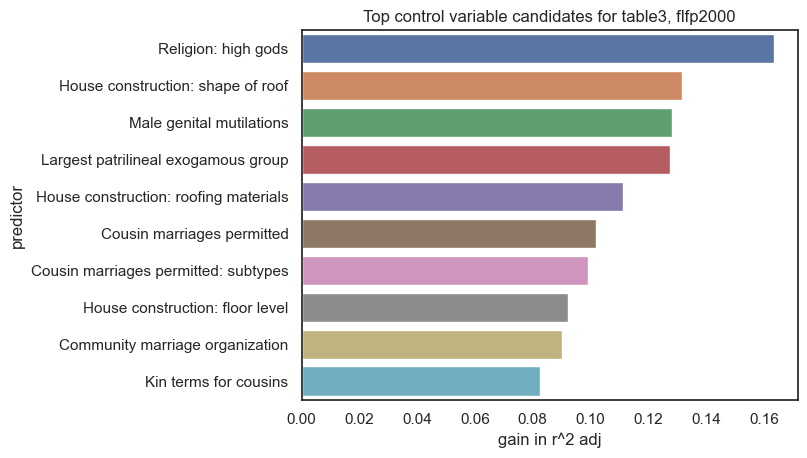

In [38]:
function_df = pd.DataFrame(function_dict).sort_values(
    by=['gain in r^2 adj'], ascending=False)

best.append(function_df['predictor'].iloc[0])

sns.barplot(x='gain in r^2 adj', y='predictor', data=function_df.replace(var_dict).head(10))
plt.title('Top control variable candidates for table3, flfp2000')

### Best second control variable for table 3

In [39]:
for column in df_cross_country_ea.columns:
    if column.startswith('EA') and column != best[0]:
        
        res = smf.ols(formula=outcome+base_form+f'+ C({column}) + C({best[0]})', data=df_cross_country_ea).fit(cov_type='HC1')

        function_dict['gain in r^2 adj'].append(res.rsquared_adj-base_rsq)
        function_dict['predictor'].append(column)
        function_dict['avg_VIF'].append(
            avg_VIF(
                pd.get_dummies(
                    df_cross_country_ea[base_cols + [column] + [best[0]]]
                ).dropna()))

Text(0.5, 1.0, 'Top 2nd control for table3, flfp2000')

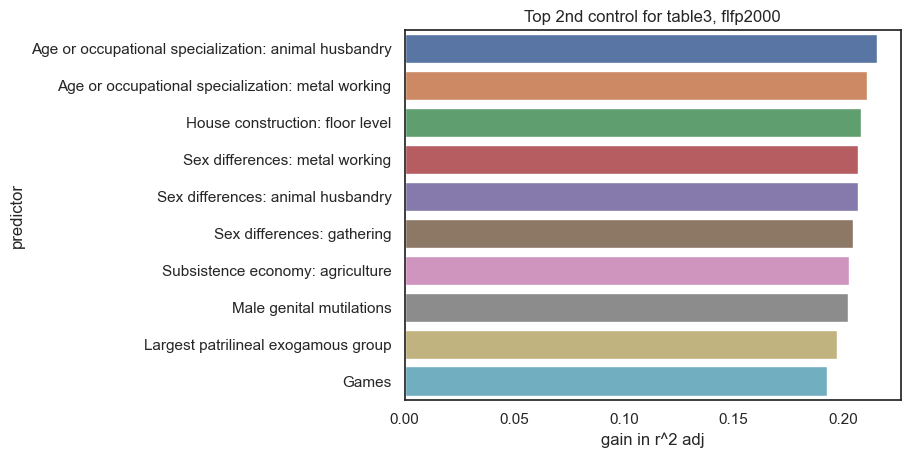

In [40]:
function_df = pd.DataFrame(function_dict).sort_values(
    by=['gain in r^2 adj'], ascending=False)

best.append(function_df['predictor'].iloc[0])

sns.barplot(x='gain in r^2 adj', y='predictor', data=function_df.replace(var_dict).head(10))
plt.title('Top 2nd control for table3, flfp2000')

### Best third control for table 3

In [41]:
for column in df_cross_country_ea.columns:
    if column.startswith('EA') and column != best[0] and column != best[1]:
        
        res = smf.ols(formula=outcome+base_form+f'+ C({column}) + C({best[0]}) + C({best[1]})', data=df_cross_country_ea).fit(cov_type='HC1')

        function_dict['gain in r^2 adj'].append(res.rsquared_adj-base_rsq)
        function_dict['predictor'].append(column)
        function_dict['avg_VIF'].append(
            avg_VIF(
                pd.get_dummies(
                    df_cross_country_ea[base_cols + [column] + [best[0]] + [best[1]]]
                ).dropna()))

Text(0.5, 1.0, 'Top 3rd control for table3, flfp2000')

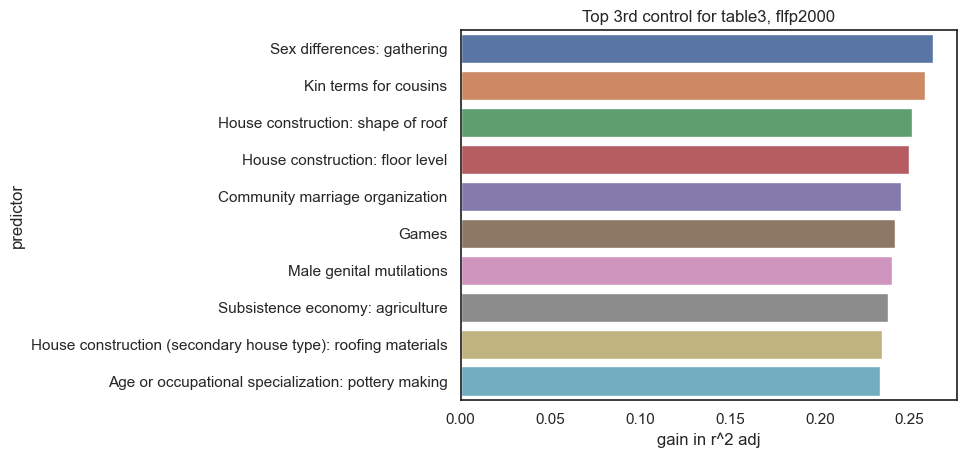

In [42]:
function_df = pd.DataFrame(function_dict).sort_values(
    by=['gain in r^2 adj'], ascending=False)

best.append(function_df['predictor'].iloc[0])

sns.barplot(x='gain in r^2 adj', y='predictor', data=function_df.replace(var_dict).head(10))
plt.title('Top 3rd control for table3, flfp2000')

# Regression Models

## Table 3, Replication

In [43]:
m_flfp = smf.ols(formula='flfp2000 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country).fit(cov_type='HC1')
m_fown = smf.ols(formula='female_ownership ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country).fit(cov_type='HC1')
m_wpol = smf.ols(formula='women_politics ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country).fit(cov_type='HC1')
m_aes = smf.ols(formula='aes ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country).fit(cov_type='HC1')
Stargazer([m_flfp, m_fown, m_wpol, m_aes])

### Continent fixed effects

In [44]:
m_flpf_c = smf.ols(formula='flfp2000 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(continent)', data=df_cross_country).fit(cov_type='HC1')
m_fown_c = smf.ols(formula='female_ownership ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(continent)', data=df_cross_country).fit(cov_type='HC1')
m_wpol_c = smf.ols(formula='women_politics ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(continent)', data=df_cross_country).fit(cov_type='HC1')
m_aes_c = smf.ols(formula='aes ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(continent)', data=df_cross_country).fit(cov_type='HC1')
Stargazer([m_flpf_c, m_fown_c, m_wpol_c, m_aes_c])

### Correlation Matrix

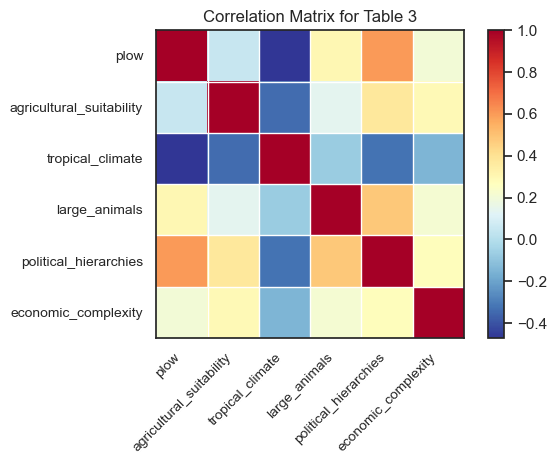

In [45]:
t3_cols = ['plow','agricultural_suitability', 'tropical_climate', 'large_animals','political_hierarchies', 'economic_complexity']
corr_matrix = np.corrcoef(df_cross_country[t3_cols].dropna().T)
sm.graphics.plot_corr(corr_matrix, xnames=df_cross_country[t3_cols].columns)
plt.title('Correlation Matrix for Table 3')
plt.show()

## Table 3, 2019 Extension

In [46]:
m_fl19 = smf.ols(formula='flfp2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country2019).fit(cov_type='HC1')
m_wp19 = smf.ols(formula='women_politics2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country2019).fit(cov_type='HC1')
m_fo19 = smf.ols(formula='female_ownership2010_to_2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country2019).fit(cov_type='HC1')
m_aes19 = smf.ols(formula='aes2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity', data=df_cross_country2019).fit(cov_type='HC1')
Stargazer([m_fl19, m_wp19, m_fo19, m_aes19])

### Continent Fixed effects

In [47]:
m_fl19 = smf.ols(formula='flfp2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity+ C(continent)', data=df_cross_country2019).fit(cov_type='HC1')
m_wp19 = smf.ols(formula='women_politics2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity+ C(continent)', data=df_cross_country2019).fit(cov_type='HC1')
m_fo19 = smf.ols(formula='female_ownership2010_to_2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity+ C(continent)', data=df_cross_country2019).fit(cov_type='HC1')
m_aes19 = smf.ols(formula='aes2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity+ C(continent)', data=df_cross_country2019).fit(cov_type='HC1')
Stargazer([m_fl19, m_wp19, m_fo19, m_aes19])

## Table 4, Replication

In [48]:
m_flfp = smf.ols(formula='flfp2000 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared', data=df_cross_country).fit(cov_type='HC1')
m_fown = smf.ols(formula='female_ownership ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared', data=df_cross_country).fit(cov_type='HC1')
m_wpol = smf.ols(formula='women_politics ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared', data=df_cross_country).fit(cov_type='HC1')
m_aes = smf.ols(formula='aes ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared', data=df_cross_country).fit(cov_type='HC1')
Stargazer([m_flfp, m_fown, m_wpol, m_aes])

### Continent fixed effects

In [49]:
m_flfp_c = smf.ols(formula='flfp2000 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared + C(continent)', data=df_cross_country).fit(cov_type='HC1')
m_fown_c = smf.ols(formula='female_ownership ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared + C(continent)', data=df_cross_country).fit(cov_type='HC1')
m_wpol_c = smf.ols(formula='women_politics ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared + C(continent)', data=df_cross_country).fit(cov_type='HC1')
m_aes_c = smf.ols(formula='aes ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared + C(continent)', data=df_cross_country).fit(cov_type='HC1')
Stargazer([m_flfp_c, m_fown_c, m_wpol_c, m_aes_c])

### Correlation Matrix

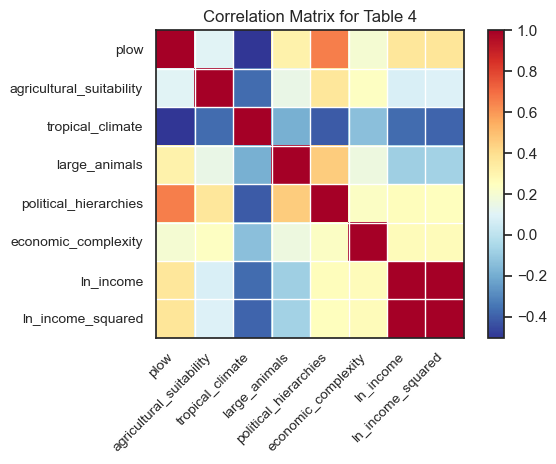

In [50]:
t4_cols = ['plow','agricultural_suitability', 'tropical_climate', 'large_animals','political_hierarchies', 'economic_complexity','ln_income', 'ln_income_squared']
corr_matrix = np.corrcoef(df_cross_country[t4_cols].dropna().T)
sm.graphics.plot_corr(corr_matrix, xnames=df_cross_country[t4_cols].columns)
plt.title('Correlation Matrix for Table 4')
plt.show()

## Table 4, 2019 Extension

In [51]:
m_fl19 = smf.ols(formula='flfp2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity+ ln_income + ln_income_squared', data=df_cross_country2019).fit(cov_type='HC1')
m_wp19 = smf.ols(formula='women_politics2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared', data=df_cross_country2019).fit(cov_type='HC1')
m_fo19 = smf.ols(formula='female_ownership2010_to_2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared', data=df_cross_country2019).fit(cov_type='HC1')
m_aes19 = smf.ols(formula='aes2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared', data=df_cross_country2019).fit(cov_type='HC1')
Stargazer([m_fl19, m_wp19, m_fo19, m_aes19])

In [52]:
m_fl19 = smf.ols(formula='flfp2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared + C(continent)', data=df_cross_country2019).fit(cov_type='HC1')
m_wp19 = smf.ols(formula='women_politics2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared+ C(continent)', data=df_cross_country2019).fit(cov_type='HC1')
m_fo19 = smf.ols(formula='female_ownership2010_to_2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared+ C(continent)', data=df_cross_country2019).fit(cov_type='HC1')
m_aes19 = smf.ols(formula='aes2019 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + ln_income + ln_income_squared+ C(continent)', data=df_cross_country2019).fit(cov_type='HC1')
Stargazer([m_fl19, m_wp19, m_fo19, m_aes19])

## Table 3 & 4, Extension - time spent at home

In [53]:
mod = smf.ols(formula='f_unpaidwk2000_to_2019 ~  plow + political_hierarchies + economic_complexity + fertility2019 + ln_income + ln_income_squared', data=df_cross_country_unpaid)
res = mod.fit(cov_type='HC1')
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     f_unpaidwk2000_to_2019   R-squared:                       0.256
Model:                                OLS   Adj. R-squared:                  0.198
Method:                     Least Squares   F-statistic:                     4.780
Date:                    Thu, 26 Jan 2023   Prob (F-statistic):           0.000349
Time:                            18:11:31   Log-Likelihood:                -214.71
No. Observations:                      83   AIC:                             443.4
Df Residuals:                          76   BIC:                             460.4
Df Model:                               6                                         
Covariance Type:                      HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

In [54]:
mod = smf.ols(formula='f_unpaidwk2000_to_2019 ~  plow + political_hierarchies + economic_complexity + fertility2019 + ln_income + ln_income_squared', data=df_cross_country_unpaid).fit(cov_type='HC1')
Stargazer([mod])

### Additional Ethnographic Atlas controls extension

In [55]:
best

['EA034', 'EA064', 'EA050']

In [56]:
[var_dict[best[i]] for i in range(len(best))]

['Religion: high gods',
 'Age or occupational specialization: animal husbandry',
 'Sex differences: gathering']

In [57]:
m1 = smf.ols(formula='flfp2000 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(EA034)', data=df_cross_country_ea).fit(cov_type='HC1')
m2 = smf.ols(formula='flfp2000 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(EA034) + C(EA064)', data=df_cross_country_ea).fit(cov_type='HC1')
m3 = smf.ols(formula='flfp2000 ~  plow + agricultural_suitability + tropical_climate + large_animals + political_hierarchies + economic_complexity + C(EA034) + C(EA064) + C(EA050)', data=df_cross_country_ea).fit(cov_type='HC1')
Stargazer([m1, m2, m3])

/opt/homebrew/Caskroom/miniconda/base/envs/ada/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 21, but rank is 20
  warnings.warn('covariance of constraints does not have full '


## Plots

Results weak. Explanation: self selection problem with countries in time spent at home being high plow and high development.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

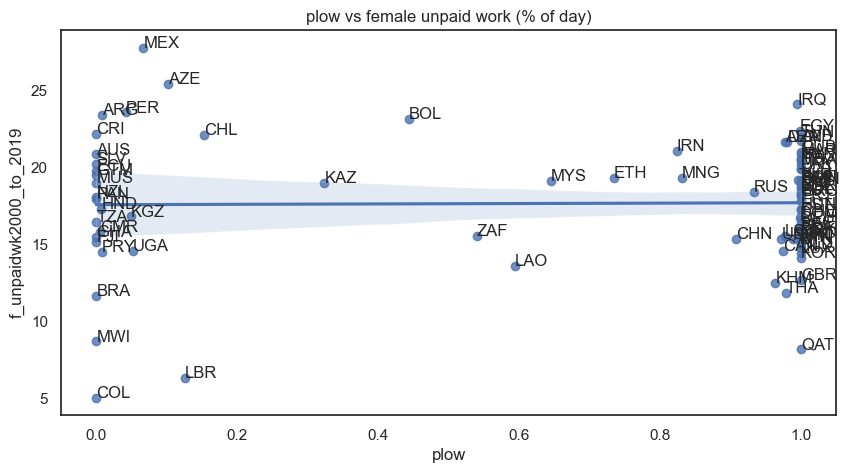

In [58]:
# plot line graph
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')
ax = sns.regplot(x='plow', y='f_unpaidwk2000_to_2019', data=df_cross_country_unpaid, marker='o') # , color='#965786')
ax.set(title='plow vs female unpaid work (% of day)')
# label points on the plot
for x, y, z in zip(df_cross_country_unpaid['plow'], df_cross_country_unpaid['f_unpaidwk2000_to_2019'], df_cross_country_unpaid['isocode']):
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x, # x-coordinate position of data label
    y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = z) # data label, formatted to ignore decimals
    # color = 'purple') # set colour of line

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

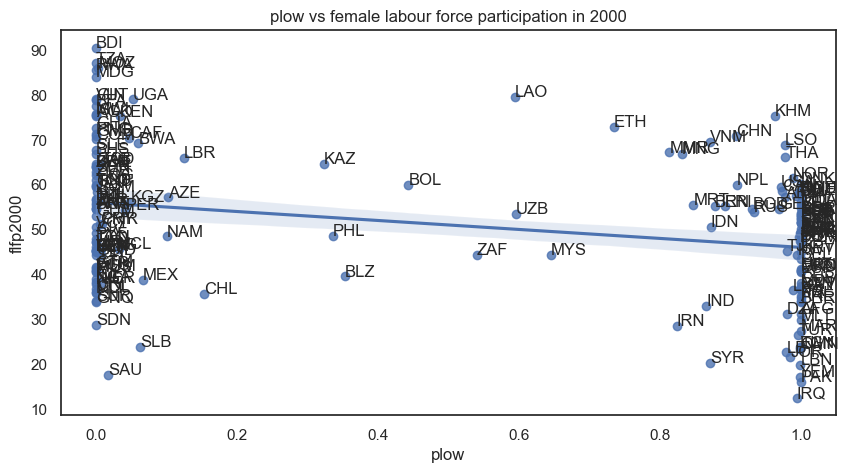

In [59]:
# plot line graph
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')
ax = sns.regplot(x='plow', y='flfp2000', data=df_cross_country_unpaid, marker='o') # , color='#965786')
ax.set(title='plow vs female labour force participation in 2000')
# label points on the plot
for x, y, z in zip(df_cross_country_unpaid['plow'], df_cross_country_unpaid['flfp2000'], df_cross_country_unpaid['isocode']):
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x, # x-coordinate position of data label
    y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = z) # data label, formatted to ignore decimals
    # color = 'purple') # set colour of line